# Druksensor ijken en maken van een $pV$-diagram

## Introductie

In de experimentele natuurkunde was het lang geleden gelukt om de krachten tussen ladingen te bestuderen zonder dat bekend was hoe groot die ladingen nu precies waren. Men laadde een metalen bol op en hield deze tegen een andere metalen bol van hetzelfde materiaal. Men redeneerde dat de ladingen op de bollen gelijk waren, omdat ze van hetzelfde materiaal waren. Vervolgens plaatste men de bollen in een vacuüm en mat men de krachten tussen de bollen met een zeer gevoelige balans. Op deze manier kon men de krachten tussen de ladingen bestuderen zonder de absolute waarde van de ladingen te kennen. Dit trucje kon herhaald worden met andere bollen waarna een kwantiatieve beschrijving van de krachten tussen ladingen mogelijk werd.

Een soortgelijke meettechniek gaan we gebruiken om een druksensor te ijken. Van de sensor zijn wel wat dingen bekend, maar omdat de spanning van de Arduino niet overeenkomstig is met de gewenste spanning, zouden we deze moeten ijken. We weten dat de sensor lineair is, dus als we twee punten weten, kunnen we de rest van de curve bepalen. Nog beter zou het zijn om drie punten te nemen en zo ook het lineaire karakter van de sensor te bevestigen.

## Theorie

Een injectiespuit met een maximaal volume van 50 mL is gevuld met lucht. De spuit kan aan een kant afgesloten worden met een tube die verbonden is met een druksensor die de gasdruk meet. Door de zuiger van de spuit in te drukken, wordt het volume verkleind en de druk verhoogd. Wanneer we de druk langzaam in drukken verwachten we dat de druk in de spuit volgens de wet van Boyle toeneemt:

$$
    P_1 V_1 = P_2 V_2 
$$ (eq:Boyle)

Omdat de gemeten spanning van de druksensor lineair afhankelijk is van de druk, kan de druk uitgedrukt worden als:

$$
    P = a U + b
$$ (eq:lineair)



## Methode en materialen

```{note} Software
De Arduino code staat al op de Arduino's. Als je de Arduino aansluit op je computer en de Arduino IDE opent, kan je de seriële monitor openen om de gemeten spanning te zien.
```

Je maakt gebruik van een Arduino. Daarvoor heb je de juiste IDE nodig. Het programma staat al op de Arduino's in het lokaal. Zodra je de Arduino aansluit op je computer zal de Arduino gaan meten, maar zijn de metingen nog niet zichtbaar. Je moet de Arduino op `Arduino MKR Zero` zetten. Dan wordt nog wel een driver geinstalleerd. 

Controleer of de Arduino herkend wordt door op `tools` -> `port` te klikken, daar staat de com poort van de Arduino. Open vervolgens de seriële monitor (het vergrootglas rechtsboven in de IDE) om de gemeten spanning te zien.

```{warning}
De twee stekkertjes hoef je NIET met elkaar te verbinden. Dit is alleen voor een meting in de brandblusser.
``` 

```{code} C++
int drukpin = A1;

void setup() {
  pinMode(A1,INPUT);
  Serial.begin(9600);
}

void loop() {
  Serial.println(analogRead(drukpin));
  delay(100);
}
```

### Deel 1
Stel de injectiespuit in op 40 mL en sluit de spuit aan op de druksensor door middel van een zo klein mogelijke tube. Meet de spanning van de druksensor met de Arduino en noteer deze waarde als $U_1$. Druk vervolgens de zuiger langzaam in tot 20 mL en meet opnieuw de spanning van de druksensor, noteer deze waarde als $U_2$. Herhaal dit voor volumes van 10 mL. 

1. Leg uit waarom een zo klein mogelijke tube gebruikt moet worden.
  
Een zo'n klein mogelijke tube is nodig, omdat het een volume heeft die zo dicht mogelijk bij 0 zit. Als gevolg blijven de maatstrepen op de spuit nauwkeuriger.

2. Welke waarde hoort bij de gasdruk bij 40 mL? Zoek deze waarde op.
  
P bij 40 ml = 1013.15 hPa

3. Welke waarden horen bij de gasdruk bij 20 en 10 mL? 

P bij 20 ml = 2 * 101315 Pa

P bij 10 ml = 4 * 101315 Pa

4. Gebruik de drie punten om de waarden van $a$ en $b$ in {numref}`vergelijking {number} <eq:lineair>` te bepalen en controleer of de sensor inderdaad lineair is door de waarden te plotten.

### Deel 2
Vervang daarbij de kleine tube voor een langere en bepaal het onbekende volume van de tube met een volgende meetserie waarbij je de druk en het volume bepaald. Zorg ervoor dat ook drukken onder de 1 atm gemeten worden. 
```{tip}
Maak gebruik van een systematische fout in het volume om het volume van de tube te vinden.
```

## Resultaten

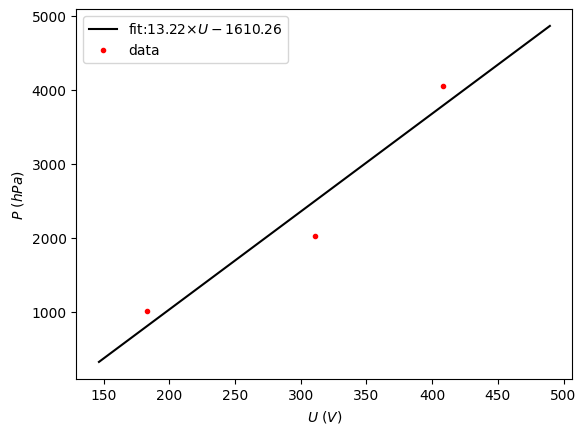

In [2]:
### Jouw data en code
from scipy.optimize import curve_fit
import numpy as np
import matplotlib.pyplot as plt

#spanning #kort
U_1 = 183 # V bij 40 mL
U_2 = 311 # V bij 20 mL
U_3 = 408 # V bij 10 mL
U = np.array([U_1,U_2,U_3])

#druk #kort
standaard_druk = 1013.15 # hPa
P_1 = standaard_druk #hPa
P_2 = P_1*2 #hPa
P_3 = P_1*4 #hPa
P = np.array([P_1,P_2,P_3])

#volume #spuit + kort
V_1 = 40 #ml
V_2 = 20 #ml
V_3 = 10 #ml
V = np.array([V_1,V_2,V_3])

def func(U,a,b):
    return a*U+b

var, covar = curve_fit(func,U,P)
a, b = var
x_fit = np.linspace(np.min(U)*0.8,np.max(U)*1.2,1000)
y_fit = func(x_fit,*var)
plt.plot(x_fit,y_fit,'k-',label = f'fit:${a:.2f}\u00D7U{b:.2f}$')
plt.plot(U,P,'r.',label = 'data')
plt.xlabel(r'$U$ $(V)$')
plt.ylabel(r'$P$ $(hPa)$')
plt.legend()

In [3]:
#spanning #lang
U_1L = 180 # V bij 40 mL
U_2L = 294 # V bij 20 mL
U_3L = 448 # V bij 10 mL
U_1 = 183 # V bij 40 mL
U_2 = 311 # V bij 20 mL
U_3 = 408 # V bij 10 mL
U_L = np.array([U_1L,U_2L,U_3L])

#druk #lang
P_L = a * U_L + b

#volume #spuit + lang
V_L = V * P / P_L

#volume #lang - kort
V_LK = V_L - V
print(V_LK)

[12.69843459 -2.19338001 -0.600492  ]
